# Loading Libraries

In [101]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)

# Loading Data

In [3]:
# Mounting the notebook to the drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# Path for the data
path = "drive/MyDrive/Colab Notebooks/Data Mining/Project/Implementation/data/"

In [35]:
# Loading data
bank_add = pd.read_csv(path+'bank-additional/bank-additional-full.csv', delimiter = ';')

# Data Exploration & Pre-Processing

In [36]:
# This function will give us the summary of data

# def data_summary(df):
#   row = {}
#   output = pd.DataFrame()
#   for i in df.columns:
#     row['ColumnName'] = i
#     row['Description'] = ''
#     row['ColumnType'] = df[i].dtype
#     row['#OfUniqueValues'] = df[i].nunique()
#     row['SampleData'] = df[i].unique()[:25]

#     output = output.append(row, ignore_index=True)
#   return output

# output = data_summary(bank_add)
# output.to_csv(path+'bank_add.csv', index = False)

In [37]:
bank_add

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [39]:
bank_add.shape

(41188, 21)

In [40]:
bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [41]:
bank_add.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [42]:
# replacing unknown values with NULL
bank_add = bank_add.replace('unknown',np.nan)
bank_add['pdays'] = bank_add['pdays'].replace(999,np.nan)

In [45]:
(bank_add.isnull().sum()/len(bank_add))*100 #count of null values

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [46]:
bank_add = bank_add.dropna(axis = 1, thresh = len(bank_add)*0.75) #Dropping columns with 75% of the records with null values

<Axes: xlabel='default'>

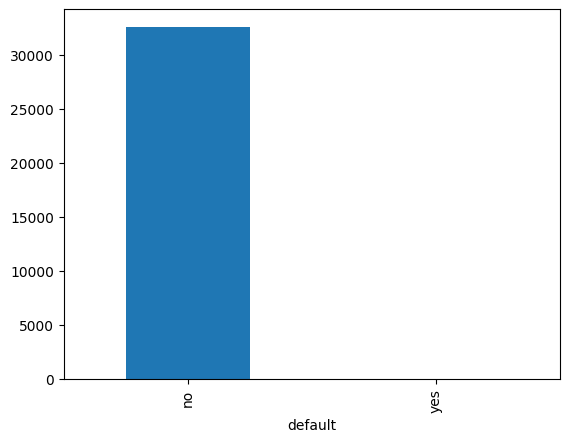

In [47]:
bank_add.groupby('default')['y'].count().plot(kind = 'bar')

In [48]:
bank_add = bank_add.drop('default', axis = 1) #dropping default column as it has only one value for all columns - 'no'

In [49]:
bank_add = bank_add.dropna() #dropping null in all columns

In [50]:
(bank_add.isnull().sum()/len(bank_add))*100 #count of null values

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [51]:
bank_add.shape

(38245, 19)

In [52]:
bank_add['job'] = bank_add['job'].replace('.',' ')

In [53]:
bank_add.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [54]:
numeric_variables = bank_add.columns[bank_add.dtypes != 'object'].tolist() #numerical columns
categorical_variables = bank_add.columns[bank_add.dtypes == 'object'].tolist() #cartegorical columns
categorical_variables.remove('y')

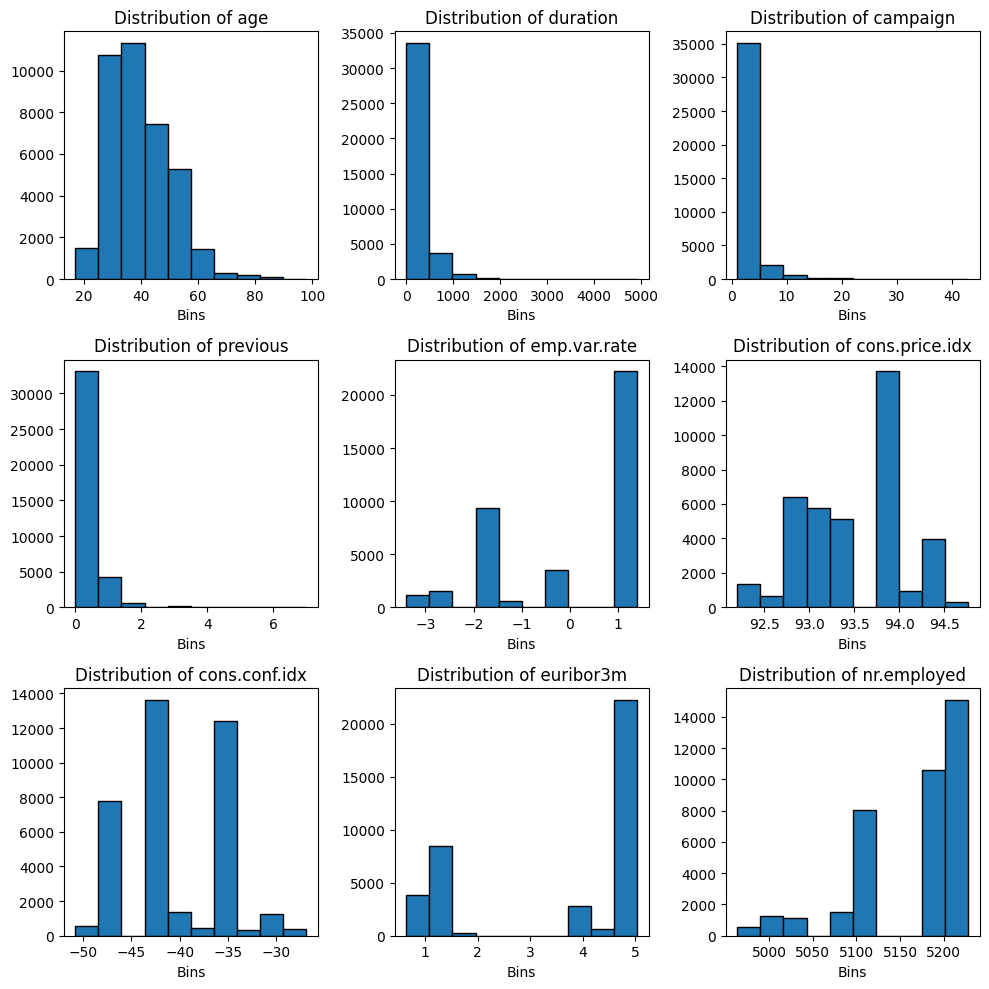

In [55]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
index = 0
for i in range(3):
  for j in range(3):
    ax[i,j].hist(bank_add[numeric_variables[index]], edgecolor='black')
    ax[i,j].set_title("Distribution of "+str(numeric_variables[index]))
    ax[i,j].set_xlabel('Bins')
    index = index + 1
plt.tight_layout()
plt.show()

In [56]:
bank_add

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [57]:
bank_add.groupby('job', as_index=False)['age'].count()

,job,age
0,admin.,9937
1,blue-collar,8560
2,entrepreneur,1360
3,housemaid,987
4,management,2728
5,retired,1577
6,self-employed,1349
7,services,3716
8,student,688
9,technician,6380


In [58]:
categorical_variables

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

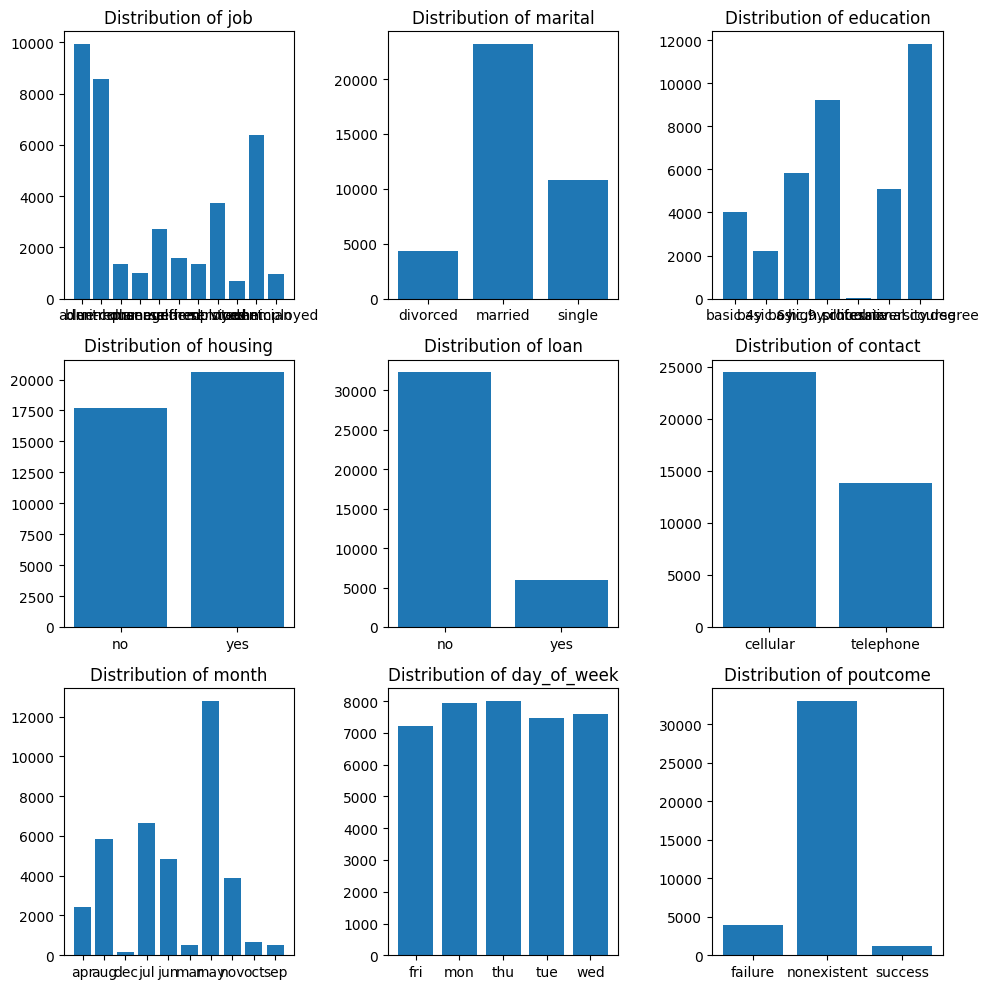

In [59]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
index = 0
for i in range(3):
  for j in range(3):
    t = bank_add.groupby(categorical_variables[index], as_index=False)['age'].count()
    ax[i,j].bar(t[categorical_variables[index]],t['age'])
    ax[i,j].set_title("Distribution of "+str(categorical_variables[index]))
    # ax[i,j].set_xlabel('Bins')
    index = index + 1
plt.tight_layout()
plt.show()

In [60]:
bank_add

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [61]:
categorical_variables

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [62]:
# Label Encoding - for categorical variables
encoder_ = LabelEncoder()

In [63]:
bank_corr_check = bank_add.copy()

In [64]:
bank_corr_check['y'] = encoder_.fit_transform(bank_corr_check['y'])

In [65]:
# One hot encoding
one_hot_encoded = pd.get_dummies(bank_corr_check[['poutcome','marital','education']])
df_encoded = pd.concat([bank_corr_check,one_hot_encoded],axis=1)
df_encoded.drop(['poutcome','marital','education','job'],axis=1,inplace=True)

In [66]:
categorical_variables2 = df_encoded.columns[df_encoded.dtypes == 'object'].tolist() 

In [67]:
for i in categorical_variables2:
  df_encoded[i] = encoder_.fit_transform(df_encoded[i])

In [68]:
df_encoded.columns

Index(['age', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')

In [69]:
df_encoded.drop(['day_of_week','month','duration'],axis=1,inplace=True)

In [70]:
df_encoded

,age,housing,loan,contact,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,57,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,37,1,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,56,0,1,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,0,1,0,0,0,0,0,0,1,0
41184,46,0,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,1,0,0,0,0,0,0,1,0
41185,56,1,0,0,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,1,0,0,0,0,0,0,0,1
41186,44,0,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,0,1,0,0,0,0,0,0,1,0


<ipython-input-71-4631aec7cfb5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank_corr_check.corr(),annot=True,cmap='Greens')


<Axes: >

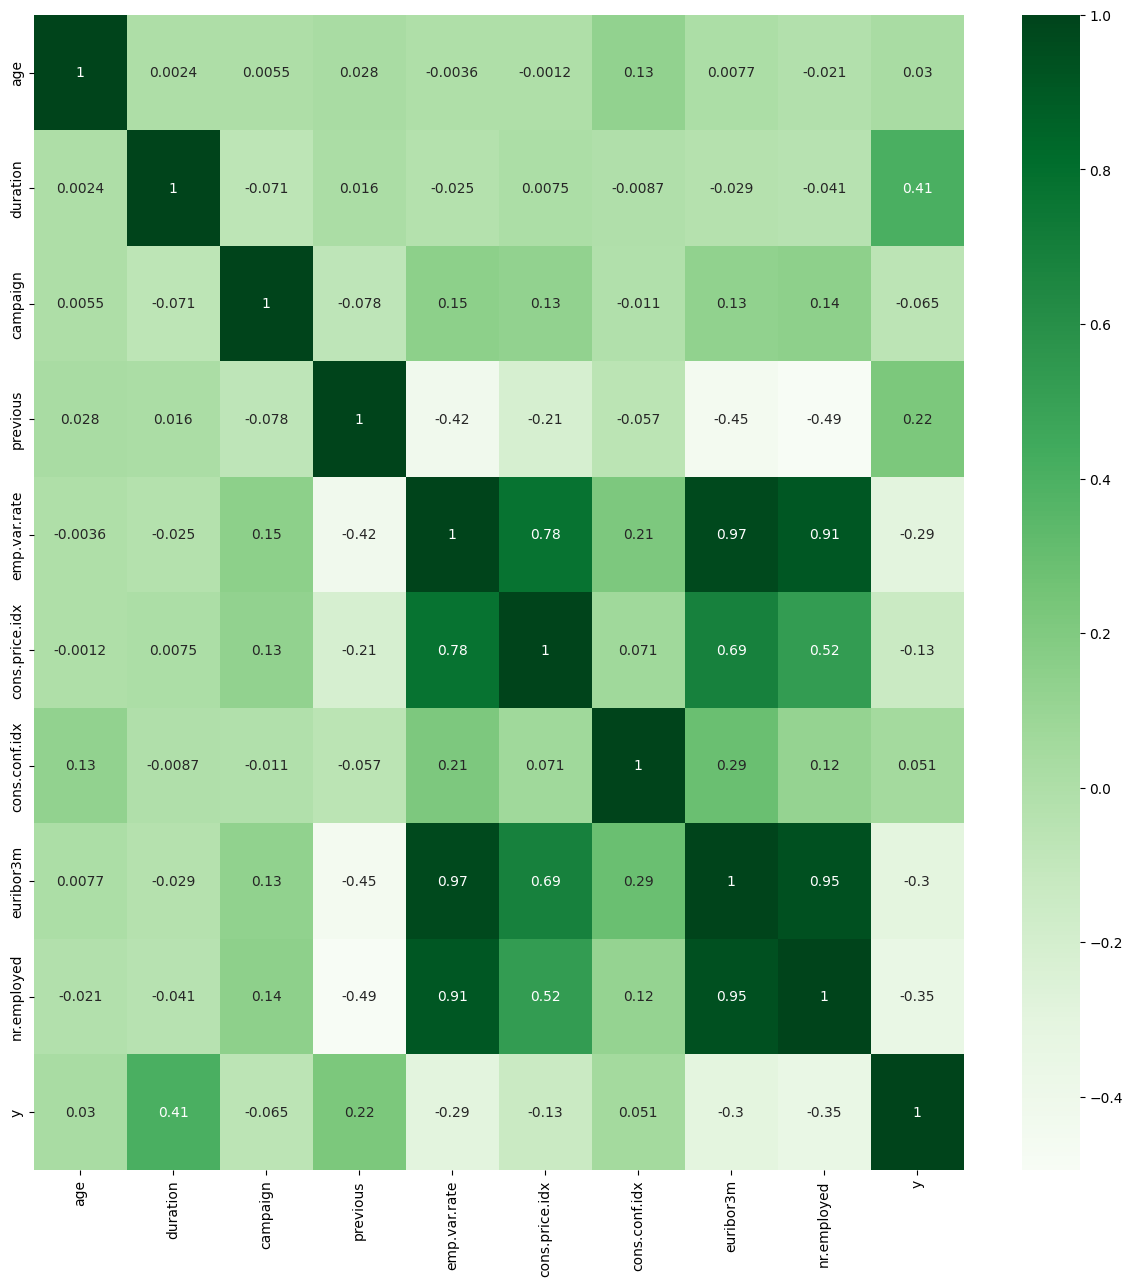

In [71]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(bank_corr_check.corr(),annot=True,cmap='Greens')

In [72]:
# Getting a correlation matrix and getting all the columns which have 100% correlated with other
corr_= bank_corr_check.corr().abs() # getting the correlation matrix
upper = corr_.where(np.triu(np.ones(corr_.shape), k=1).astype(np.bool)) # making the lower traingle null
drop_col = [column for column in upper.columns if any(upper[column] >= 0.9)] # getting one of the columns to drop if they are same

<ipython-input-72-951b823455e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_= bank_corr_check.corr().abs() # getting the correlation matrix
<ipython-input-72-951b823455e3>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_.where(np.triu(np.ones(corr_.shape), k=1).astype(np.bool)) # making the lower traingle null


In [73]:
drop_col

['euribor3m', 'nr.employed']

In [74]:
drop_col = drop_col + ['duration']

In [75]:
bank_add = bank_add.drop(drop_col, axis = 1)

In [76]:
df_encoded

,age,housing,loan,contact,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,57,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,37,1,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,56,0,1,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,0,1,0,0,0,0,0,0,1,0
41184,46,0,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,1,0,0,0,0,0,0,1,0
41185,56,1,0,0,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,1,0,0,0,0,0,0,0,1
41186,44,0,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,0,1,0,0,0,0,0,0,1,0


# Model building and Performance evaluation


In [78]:
X = df_encoded.drop(['y'],axis=1)
y = df_encoded['y'].values.reshape(-1, 1)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=32)

## Model 1 - Logistic Regression

In [80]:
logistic_regression = LogisticRegression()

In [81]:
logistic_regression.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred1 = logistic_regression.predict(x_test)

In [83]:
accuracy1 = accuracy_score(y_test,y_pred1)
accuracy1

0.8935369169629784

In [84]:
accuracy1 = accuracy_score(y_test,y_pred1)
precision1 = precision_score(y_test,y_pred1)
recall1 = recall_score(y_test,y_pred1)
print(f"ACCURACY for Logistic Regression:{accuracy1:.3f}")
print(f"Precision :{precision1:.3f} and Recall : {recall1:.3f}")


ACCURACY for Logistic Regression:0.894
Precision :0.552 and Recall : 0.241


In [85]:
#MAE
mae = mean_absolute_error(y_test,y_pred1)
print(f"MAE for Logistic Regression: {mae:.3f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_pred1))
print(f"RMSE for Logistic Regression:{rmse:.3f}")


MAE for Logistic Regression: 0.106
RMSE for Logistic Regression:0.326


In [86]:
confusion_matrix1 = confusion_matrix(y_test,y_pred1)

In [87]:
cm = confusion_matrix(y_test,y_pred1)

In [88]:
confusion_matrix1

array([[8287,  209],
       [ 809,  257]])

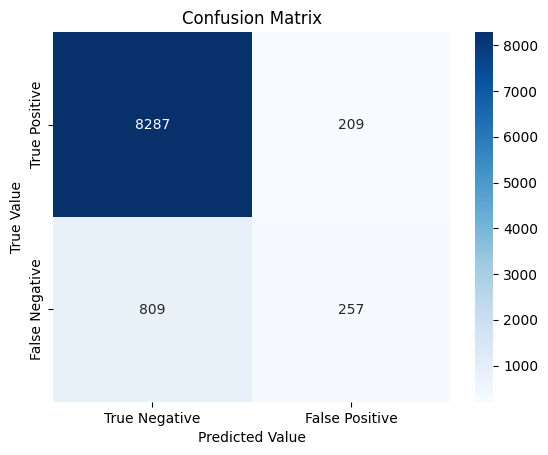

In [89]:
xlabels = ['True Negative', 'False Positive']
ylabels = ['True Positive', 'False Negative']


# Reshape the confusion matrix to a 1D array
cm_1d = cm.ravel()

# Convert the counts to strings without scientific notation and no decimal places
cm_1d_str = [f'{count:.0f}' for count in cm_1d]

# Reshape the string array back to its original shape
cm_annot = np.array(cm_1d_str).reshape((2, 2))

# Create a heatmap visualization of the confusion matrix with count annotations
sns.heatmap(cm, annot=cm_annot, fmt='', cmap='Blues', xticklabels=xlabels, yticklabels=ylabels)

# Set the axis labels and plot title
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [90]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred1)

In [91]:
auc1 = metrics.auc(fpr,tpr)

## Model 2 - Support Vector Machine

In [92]:
SVM = SVC(kernel='linear')

In [93]:
SVM.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [94]:
y_pred2 = SVM.predict(x_test)

In [95]:
accuracy2 = accuracy_score(y_test,y_pred2)
precision2 = precision_score(y_test,y_pred2)
recall2 = recall_score(y_test,y_pred2)
print(f"ACCURACY for SVM:{accuracy2:.3f}")
print(f"Precision :{precision2:.3f} and Recall : {recall2:.3f}")

ACCURACY for SVM:0.898
Precision :0.711 and Recall : 0.136


In [96]:
#MAE
mae = mean_absolute_error(y_test,y_pred2)
print(f"MAE for Support Vector Machine model: {mae:.3f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_pred2))
print(f"RMSE for Support Vector Machine model:{rmse:.3f}")


MAE for Support Vector Machine model: 0.102
RMSE for Support Vector Machine model:0.320


In [97]:
cm2 = confusion_matrix(y_test,y_pred2)

In [98]:
cm2

array([[8437,   59],
       [ 921,  145]])

In [99]:
xlabels = ['True Negative', 'False Positive']
ylabels = ['True Positive', 'False Negative']

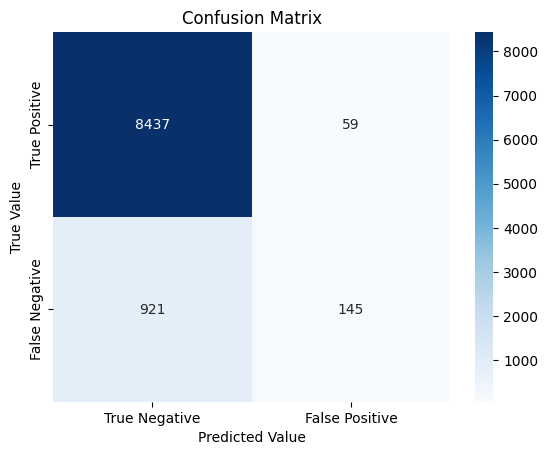

In [100]:
# Reshape the confusion matrix to a 1D array
cm_1d = cm2.ravel()

# Convert the counts to strings without scientific notation and no decimal places
cm_1d_str = [f'{count:.0f}' for count in cm_1d]

# Reshape the string array back to its original shape
cm_annot = np.array(cm_1d_str).reshape((2, 2))

# Create a heatmap visualization of the confusion matrix with count annotations
sns.heatmap(cm2, annot=cm_annot, fmt='', cmap='Blues', xticklabels=xlabels, yticklabels=ylabels)

# Set the axis labels and plot title
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


## Model 3 - Decision Trees

In [102]:
Tree = DecisionTreeClassifier(min_samples_leaf=1,max_leaf_nodes=7,max_depth=3)

In [103]:
parameter_grid = {'max_depth': [2, 3, 4, 5,6,7], 'min_samples_leaf': [1, 2, 3,4,5], 'max_leaf_nodes': [2,3, 4, 5, 6,7] }

In [104]:
grid_search = GridSearchCV(Tree, parameter_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [105]:
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 1}


In [106]:
Tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7)

In [107]:
y_pred3 = Tree.predict(x_test)

In [108]:
accuracy3 = accuracy_score(y_test,y_pred3)
precision3 = precision_score(y_test,y_pred3)
recall3 = recall_score(y_test,y_pred3)
print(f"ACCURACY for Decision Trees:{accuracy3:.3f}")
print(f"Precision :{precision3:.3f} and Recall : {recall3:.3f}")

ACCURACY for Decision Trees:0.902
Precision :0.745 and Recall : 0.187


In [109]:
#MAE
mae = mean_absolute_error(y_test,y_pred3)
print(f"MAE for Decision Trees model: {mae:.3f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_pred3))
print(f"RMSE for Decision Trees model: {rmse:.3f}")


MAE for Decision Trees model: 0.098
RMSE for Decision Trees model: 0.313


In [110]:
cm3 = confusion_matrix(y_test,y_pred3)

In [111]:
cm3

array([[8428,   68],
       [ 867,  199]])

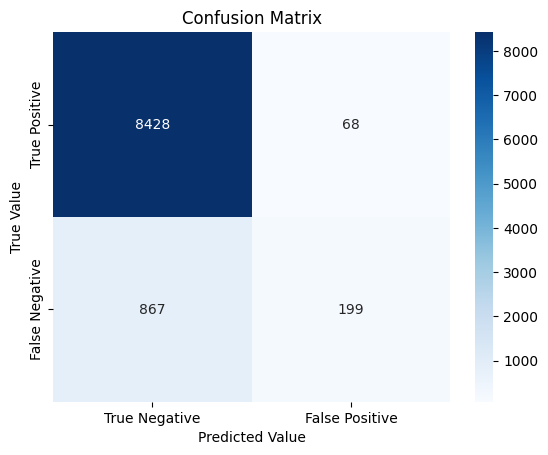

In [112]:
# Reshape the confusion matrix to a 1D array
cm_1d = cm3.ravel()

# Convert the counts to strings without scientific notation and no decimal places
cm_1d_str = [f'{count:.0f}' for count in cm_1d]

# Reshape the string array back to its original shape
cm_annot = np.array(cm_1d_str).reshape((2, 2))

# Create a heatmap visualization of the confusion matrix with count annotations
sns.heatmap(cm3, annot=cm_annot, fmt='', cmap='Blues', xticklabels=xlabels, yticklabels=ylabels)

# Set the axis labels and plot title
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


## Model 4 - Gradient Boosting

In [113]:
GradientBoosting = GradientBoostingClassifier()

In [114]:
GradientBoosting.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [115]:
y_pred4 = GradientBoosting.predict(x_test)

In [116]:
accuracy4 = accuracy_score(y_test,y_pred4)
precision4 = precision_score(y_test,y_pred4)
recall4 = recall_score(y_test,y_pred4)
print(f"ACCURACY for Gradient Boosting:{accuracy4:.3f}")
print(f"Precision :{precision4:.3f} and Recall : {recall4:.3f}")

ACCURACY for Gradient Boosting:0.902
Precision :0.657 and Recall : 0.259


In [117]:
#MAE
mae = mean_absolute_error(y_test,y_pred4)
print(f"MAE for Gradient Boosting model: {mae:.3f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_pred4))
print(f"RMSE for Gradient Boosting model: {rmse:.3f}")


MAE for Gradient Boosting model: 0.098
RMSE for Gradient Boosting model: 0.313


In [118]:
cm4 = confusion_matrix(y_test,y_pred4)

In [119]:
cm4

array([[8352,  144],
       [ 790,  276]])

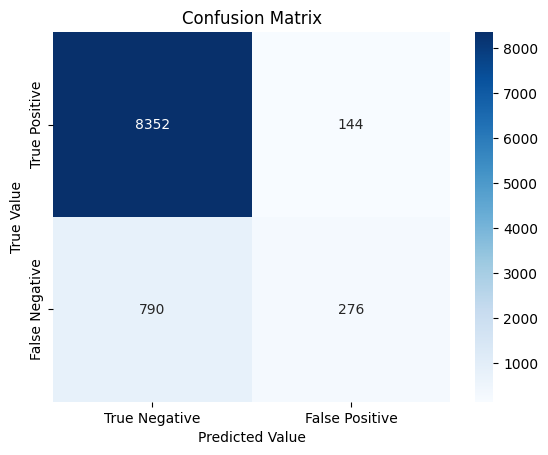

In [120]:
# Reshape the confusion matrix to a 1D array
cm_1d = cm4.ravel()

# Convert the counts to strings without scientific notation and no decimal places
cm_1d_str = [f'{count:.0f}' for count in cm_1d]

# Reshape the string array back to its original shape
cm_annot = np.array(cm_1d_str).reshape((2, 2))

# Create a heatmap visualization of the confusion matrix with count annotations
sns.heatmap(cm4, annot=cm_annot, fmt='', cmap='Blues', xticklabels=xlabels, yticklabels=ylabels)

# Set the axis labels and plot title
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Model-5 Random Forest

In [121]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15, min_samples_split=5, min_samples_leaf=2, max_features=0.5)

In [122]:
random_forest.fit(x_train,y_train)

<ipython-input-122-6f391acbaaaf>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train,y_train)


RandomForestClassifier(max_depth=15, max_features=0.5, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [123]:
y_pred5 = random_forest.predict(x_test)

In [124]:
accuracy5 = accuracy_score(y_test,y_pred5)
precision5 = precision_score(y_test,y_pred5)
recall5 = recall_score(y_test,y_pred5)
print(f"ACCURACY for random forest:{accuracy5:.3f}")
print(f"Precision :{precision5:.3f} and Recall : {recall5:.3f}")

ACCURACY for random forest:0.900
Precision :0.610 and Recall : 0.286


In [125]:
y_predx = random_forest.predict(x_train)
acc = accuracy_score(y_train,y_predx)

acc

0.9363037339190461

In [126]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

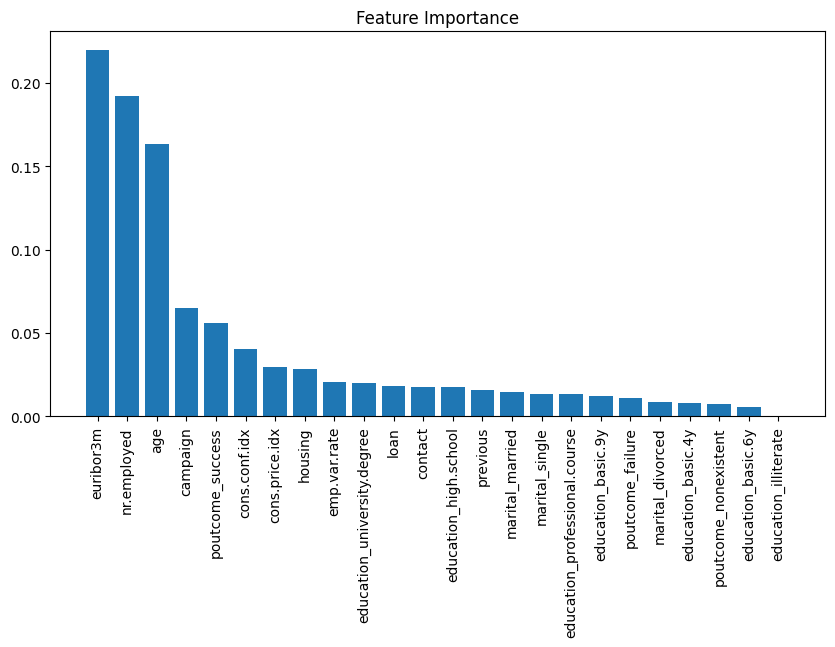

In [127]:
plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


In [128]:
df_encoded.columns

Index(['age', 'housing', 'loan', 'contact', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree'],
      dtype='object')

In [129]:
new_df = df_encoded[['age','cons.price.idx','cons.conf.idx','poutcome_success','emp.var.rate','campaign',
                     'previous','housing','contact','poutcome_failure',
                     'loan','contact','y']]

In [130]:
X1 = new_df.drop(['y'],axis=1)
y1 = new_df['y'].values.reshape(-1, 1)

In [131]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.25,random_state=32)

In [132]:
random_forest.fit(x_train1,y_train1)

<ipython-input-132-6055b54ad1e4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train1,y_train1)


RandomForestClassifier(max_depth=15, max_features=0.5, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [133]:
y_pred6 = random_forest.predict(x_test1)

In [134]:
accuracy5 = accuracy_score(y_test,y_pred6)
precision5 = precision_score(y_test,y_pred6)
recall5 = recall_score(y_test,y_pred6)
print(f"ACCURACY for Random Forest:{accuracy5:.3f}")
print(f"Precision :{precision5:.3f} and Recall : {recall5:.3f}")

ACCURACY for Random Forest:0.899
Precision :0.598 and Recall : 0.277


In [135]:
#MAE
mae = mean_absolute_error(y_test,y_pred6)
print(f"MAE for Random Forest model: {mae:.3f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_pred6))
print(f"RMSE for Random Forest model: {rmse:.3f}")


MAE for Random Forest model: 0.101
RMSE for Random Forest model: 0.318


In [136]:
cm5 = confusion_matrix(y_test,y_pred6)

In [137]:
cm5

array([[8298,  198],
       [ 771,  295]])

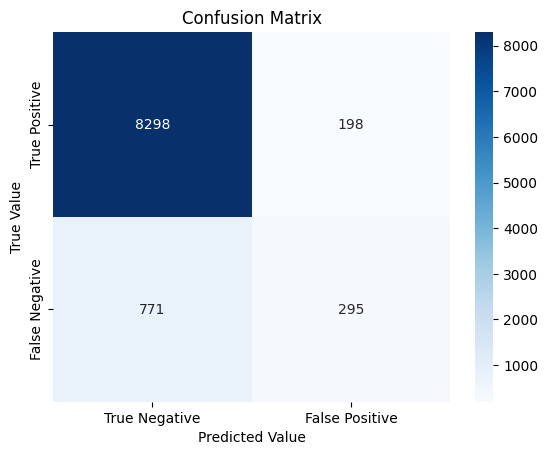

In [138]:
# Reshape the confusion matrix to a 1D array
cm_1d = cm5.ravel()

# Convert the counts to strings without scientific notation and no decimal places
cm_1d_str = [f'{count:.0f}' for count in cm_1d]

# Reshape the string array back to its original shape
cm_annot = np.array(cm_1d_str).reshape((2, 2))

# Create a heatmap visualization of the confusion matrix with count annotations
sns.heatmap(cm5, annot=cm_annot, fmt='', cmap='Blues', xticklabels=xlabels, yticklabels=ylabels)

# Set the axis labels and plot title
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [139]:
y_pred7 = random_forest.predict(x_train1)
accuracy7 = accuracy_score(y_train,y_pred7)
accuracy7

0.926576717916536

# Performance Evaluation

Text(0, 0.5, 'True Positive Rate')

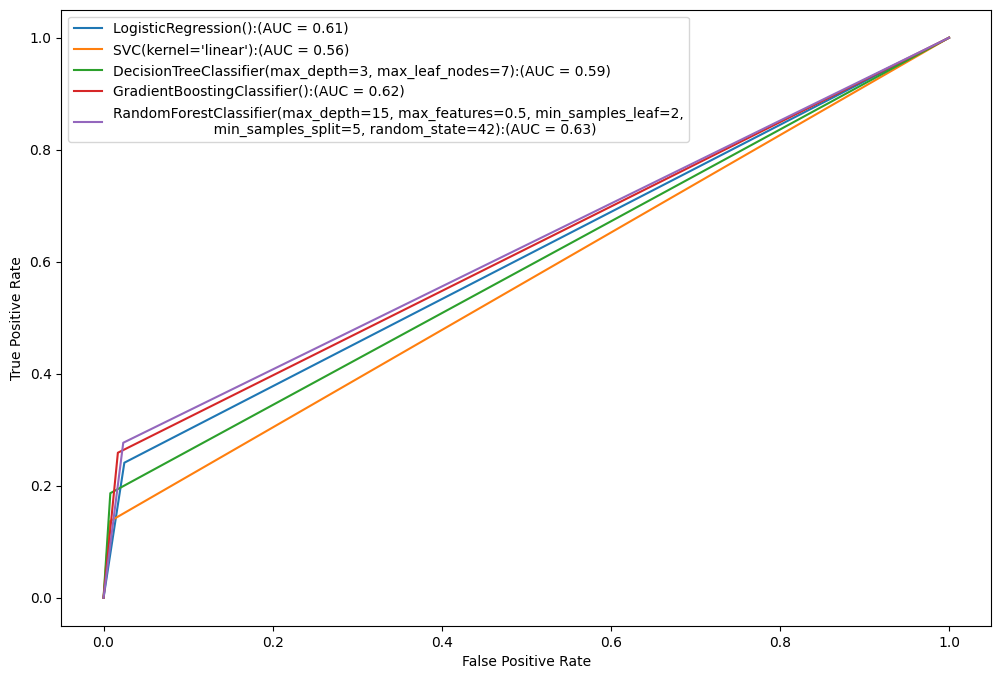

In [140]:
models = [logistic_regression, SVM, Tree, GradientBoosting,random_forest]
y_pred = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred6]
plt.figure(figsize=(12,8))
aucs=[]
for i,model in enumerate(models):
  y_predx = y_pred[i]
  fpr,tpr,threshold = metrics.roc_curve(y_test,y_predx)
  auc = metrics.auc(fpr,tpr)
  plt.plot(fpr, tpr, label=f"{model}:(AUC = {auc:.2f})")
  aucs.append(auc)
plt.legend() 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [141]:
Accuracy = []
Precision = []
recall = []
for i in range(1,6):
  acc = eval(f"accuracy{i}")
  prc = eval(f"precision{i}")
  rc = eval(f"recall{i}")
  Accuracy.append(acc)
  Precision.append(prc)
  recall.append(rc)
  
Accuracy

[0.8935369169629784,
 0.8975109809663251,
 0.9022171093913407,
 0.9023216900230078,
 0.8986613679146622]

In [142]:
recall

[0.24108818011257035,
 0.13602251407129456,
 0.18667917448405252,
 0.2589118198874296,
 0.2767354596622889]

In [143]:
models1= ['Logistic Regression','SVM','Decision Tree Classifier','Gradient Boost','Random Forest']

In [144]:
data = {'Models': models1, 'Accuracy': Accuracy, 'Precision': Precision, 'recall': recall}
df = pd.DataFrame(data)

In [145]:
df

,Models,Accuracy,Precision,recall
0,Logistic Regression,0.893537,0.551502,0.241088
1,SVM,0.897511,0.710784,0.136023
2,Decision Tree Classifier,0.902217,0.745318,0.186679
3,Gradient Boost,0.902322,0.657143,0.258912
4,Random Forest,0.898661,0.598377,0.276735
